# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
seed = 0
env = UnityEnvironment(file_name="Banana.app",seed = seed)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# # reset the environment
# env_info = env.reset(train_mode=True)[brain_name]

# # number of agents in the environment
# print('Number of agents:', len(env_info.agents))

# # number of actions
# action_size = brain.vector_action_space_size
# print('Number of actions:', action_size)

# # examine the state space 
# state = env_info.vector_observations[0]
# print('States look like:', state)
# state_size = len(state)
# print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### initializing the agent

In [7]:
from dqn_agent import Agent
import torch

In [8]:
def banana_dqn(episodes_num=2000, epsilon_start=1.0, epsilon_min=0.01, epsilon_decay=0.995):
    scores = []
    score_window = deque(maxlen=100)
    epsilon = epsilon_start
    max_score = 15.0
    with open('testfile.txt','w') as reward_file:
        for episode in range(1, episodes_num+1):
            # reset the environment
            env_info = env.reset(train_mode=True)[brain_name] # reset the environment
            state = env_info.vector_observations[0]            # get the current state
            
            score = 0
            while True:
                #1 take action from DQN
                action = agent.act(state, eps= epsilon)              # select an action
                env_info = env.step(action)[brain_name]        # send the action to the environment
                next_state = env_info.vector_observations[0]   # get the next state
                reward = env_info.rewards[0]                   # get the reward
                done = env_info.local_done[0]                  # see if episode has finished
                agent.step(state, action, reward, next_state, done)
                score += reward                                # update the score
                reward_file.write("total_score:{}\treward:{}\taction:{}\n".format(score, reward, action))
                state = next_state                             # roll over the state to next time step
                if done:                                       # exit loop if episode finished
                    break
            score_window.append(score)
            scores.append(score)
            epsilon = max(epsilon_min, epsilon*epsilon_decay)
            
            print('\rEpisode: {}\tAverage Score: {:.2f}, score:{:.2f}'.format(episode, np.mean(score_window), score), end="")
            reward_file.write("Episode :{}\tAverage Score:{}\n".format(episode, np.mean(score_window)))
            if episode % 100 == 0:
                print('\rEpisode: {}\tAverage Score: {:.2f}'.format(episode, np.mean(score_window)))
            if np.mean(score_window)>= max_score:
                torch.save(agent.QN_local.state_dict(), 'checkpoint.pth')
                break
    return scores

env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])
print('Action Size:{}, State Size:{}'.format(action_size, state_size))
agent = Agent(state_size, action_size, seed = seed, training = True)
scores = banana_dqn()


Action Size:4, State Size:37
Episode: 100	Average Score: 0.57, score:3.00
Episode: 200	Average Score: 2.43, score:3.000
Episode: 300	Average Score: 4.50, score:2.000
Episode: 400	Average Score: 8.39, score:12.00
Episode: 500	Average Score: 10.36, score:15.00
Episode: 600	Average Score: 11.57, score:14.00
Episode: 700	Average Score: 11.68, score:7.000
Episode: 800	Average Score: 12.46, score:10.00
Episode: 900	Average Score: 13.26, score:7.000
Episode: 1000	Average Score: 13.14, score:12.00
Episode: 1100	Average Score: 13.88, score:12.00
Episode: 1200	Average Score: 12.90, score:13.00
Episode: 1300	Average Score: 14.96, score:10.00
Episode: 1301	Average Score: 15.04, score:18.00

'\nAction Size:4, State Size:37\nEpisode: 100\tAverage Score: 0.28, score:-1.00\nEpisode: 200\tAverage Score: 1.59, score:3.000\nEpisode: 300\tAverage Score: 3.58, score:3.000\nEpisode: 400\tAverage Score: 6.30, score:12.00\nEpisode: 500\tAverage Score: 9.50, score:5.000\nEpisode: 600\tAverage Score: 11.79, score:8.000\nEpisode: 700\tAverage Score: 12.53, score:13.00\nEpisode: 765\tAverage Score: 14.05, score:21.00\n'

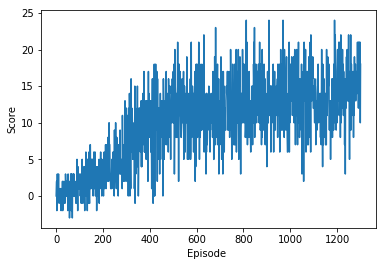

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)),scores)
plt.xlabel('Episode ')
plt.ylabel('Score')
plt.show()


## Test

In [11]:

for i in range(5):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    action_size = brain.vector_action_space_size
    state_size = len(env_info.vector_observations[0])

    agent = Agent(state_size, action_size, seed = seed, training = False)
    agent.QN_local.load_state_dict(torch.load('checkpoint.pth'))

    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=.0)                      # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    print("Test: {} Score: {}".format(i, score))

Test: 0 Score: 15.0
Test: 1 Score: 2.0
Test: 2 Score: 11.0
Test: 3 Score: 19.0
Test: 4 Score: 21.0


In [12]:
env.close()